In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18}
sns.set(rc=rc)


def ShawOde(y,t, betaA,betaP,betaC,phi,v,gammaA,gammaC,gammaQ,alphaC,alphaQ, lambdaVal):
    S, Ia, Ip, Ic, Q, R = y #unpack state variables from initial condition
    
    dydt = [-1*(betaA * Ia + betaP * Ip + betaC * Ic)* S,
            phi * (betaA * Ia + betaP * Ip + betaC * Ic)*S - (gammaA* Ia),
            (1-phi)*(betaA * Ia + betaP * Ip + betaC * Ic)*S - v*Ip,
            v*Ip - (alphaC + gammaC + lambdaVal) * Ic,
            lambdaVal * Ic - (alphaQ + gammaQ)*Q, 
            gammaA * Ia +  gammaC* Ic + gammaQ * Q ]
    return dydt


def CalcArrNaught(params):
    S = 1
    betaA,betaP,betaC,phi,v,gammaA,gammaC,gammaQ,alphaC,alphaQ, lambdaVal = params
    term1 = (phi*betaA*S)/(gammaA)
    term2 = ((1-phi)*(betaP)*S)/(v)
    term3 = ((1-phi)*(betaC)*S)/(lambdaVal + alphaC + gammaC)
    
    return(term1+term2+term3)



###PARAMS###
betaA = 0.12
betaP = 0.4
betaC = 0.4

phi = 0.5

v = 0.25

gammaA = 0.1
gammaC = 0.1
gammaQ = 0.1

alphaC = 0.001 
alphaQ = 0.001 

lambdaVal = 0.024

y0 = [1,0.0001,0.0001,0,0,0]
dt = 0.1

###Pack Params###

params = [betaA,betaP,betaC,phi,v,gammaA,gammaC,gammaQ,alphaC,alphaQ, lambdaVal]

###Get first R0
R01 = CalcArrNaught(params)




[0.12, 0.4, 0.4, 0.5, 0.25, 0.1, 0.1, 0.1, 0.001, 0.001, 0.23232323232323232]


Text(0.5, 1.0, 'R0 =  3.0')

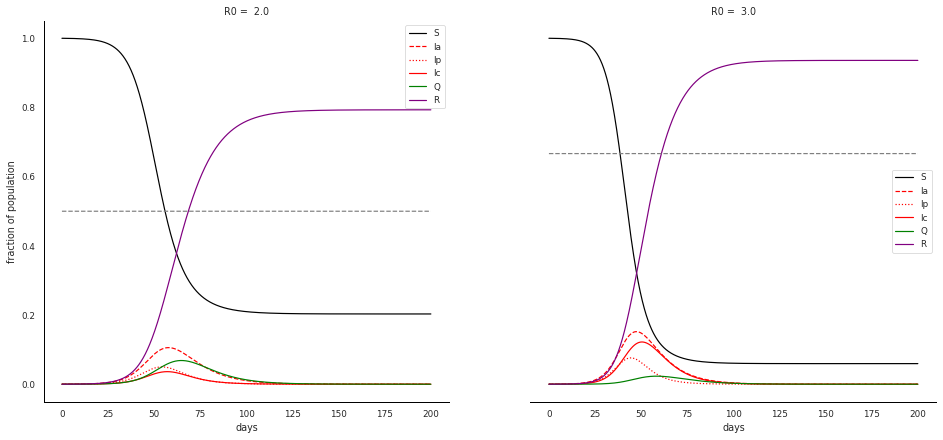

In [2]:
#create time array
t  = np.arange(0,200 + dt, dt )
t2 = np.arange(0,200 + dt, dt )


#solve with odeint /// using lsoda 
solODEint   = odeint(ShawOde, y0, t, args = (betaA,betaP,betaC,phi,v,gammaA,gammaC,gammaQ,alphaC,alphaQ, lambdaVal))

#Change Value of Lambda

lambdaVal = 0.2323232323232323232323232
params = [betaA,betaP,betaC,phi,v,gammaA,gammaC,gammaQ,alphaC,alphaQ, lambdaVal]
print(params)

R02 = CalcArrNaught(params)


#Re-solve
solODEint2   = odeint(ShawOde, y0, t, args = (betaA,betaP,betaC,phi,v,gammaA,gammaC,gammaQ,alphaC,alphaQ, lambdaVal))







#Plotting
sns.set_style("whitegrid", {'axes.grid' : False}) #remove grey grid
sns.set_context("paper") #changes the theme or the size or something ... not sure why I added this. 
plt.rcParams['figure.figsize'] = [16, 7] #changes the size






#put both plots next to eachother 
fig, ax =plt.subplots(1,2) 
#plot all the groups in the SECOND model
ax[0].plot(t,solODEint2[:,0], label = "S",  color = "black")
ax[0].plot(t,solODEint2[:,1], label = "Ia", linestyle = "--", color = "red") #style is to match the paper
ax[0].plot(t,solODEint2[:,2], label = "Ip", linestyle = ":", color = "red")
ax[0].plot(t,solODEint2[:,3], label = "Ic", color = "red")
ax[0].plot(t,solODEint2[:,4], label = "Q", color = "green")
ax[0].plot(t,solODEint2[:,5], label = "R",  color = "purple")
#This adds the grey line from the Shaw Kennedy paper to the graph
ax[0].plot(t,((1- (1/R02))*np.ones(len(t))), color = "grey", linestyle = "--") 


#plot all the groups in the FIRST model
plt.plot(t,solODEint[:,0], label = "S",  color = "black")
plt.plot(t,solODEint[:,1], label = "Ia", linestyle = "--", color = "red")
plt.plot(t,solODEint[:,2], label = "Ip", linestyle = ":", color = "red")
plt.plot(t,solODEint[:,3], label = "Ic", color = "red")
plt.plot(t,solODEint[:,4], label = "Q", color = "green")
plt.plot(t,solODEint[:,5], label = "R",  color = "purple")
#This adds the grey line from the Shaw Kennedy paper to the graph; this doesn't line up for me --- error?? 
plt.plot(t,((1- (1/R01))*np.ones(len(t))), color = "grey", linestyle = "--")


#Add legend and time axis
plt.legend(loc='best')
plt.xlabel('days')
plt.ylabel('fraction of population')
ax[0].legend(loc='best')
ax[0].set_xlabel('days')
ax[0].set_ylabel('fraction of population')

#Change some graph aesthetic to match the Shaw Kennedy paper:
ax[1].get_yaxis().set_visible(False)
sns.despine()
sns.despine(left=True, ax = ax[1])
ax[0].spines['left'].set_color('black')
ax[0].spines['bottom'].set_color('black')
ax[1].spines['bottom'].set_color('black')




#Set up title to incorporate variable R_0
Title1 = f"R0 =  {round(R01,2)}"
Title2 = f"R0 =  {round(R02,2)}"

#Add title
ax[0].set_title(Title2)
ax[1].set_title(Title1)

###Final note: When testing, run the whole notebook! Otherwise, the change to lambda in this code
# chunk will make both graphs identical. 